# Fitting a Galprop Model to the Full Sky. 

We reproduce the global fitting analysis of http://arxiv.org/abs/1603.06584.  The fit is done in three stages using output files from Galprop.  First we fit the high latitude sky, then we fit the outer galaxy, and finally, the inner Galaxy.  XCO is allowed to float freely in this case.  

The output format is a single HDF5 file, which will be useful in later analysis. If one does not wish to fit a galprop model, but instead just use the output, see the tutorial, using Galprop output. 


This analysis assumes that the galprop output has 9 rings for each gas component.  These input gas maps to galprop can be found in the support_files folder of the GammaLike github repo.

In [1]:
import sys
sys.path.append('/data/GammaLike/')
from GammaLike import Analysis 

basepath = '/data/GammaLike/testing/'
tag = 'P8R2_CLEAN_V6_calore' 
A = Analysis.Load(basepath+tag+'.GLanalysis')

support_files_path = '/data/GammaLike/support_files/'


A.AddIsotropicTemplate(isofile=support_files_path+'/IGRB_ackerman_2014_modA.dat',
                       fixNorm=False, fixSpectrum=True) 

A.AddPointSourceTemplate(fixNorm=True, # Fix the template normalization in all bins.
                         # This was generated in "Starting a New Analysis"  tutorial
                         pscmap=A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy') 

A.CalculatePixelWeights(diffuse_model=A.basepath+'/'+'fermi_diffuse_'+A.tag+'.npy',
                        psc_model=A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=0.1) # see 1409.0042 Eq.(2.6)

A.AddFermiBubbleTemplate(template_file=support_files_path+'/new_bubble_template.fits.gz',
                         spec_file=support_files_path+'/reduced_bubble_spec_apj_793_64.dat', fixSpectrum=True, fixNorm=False)
# Load the binned photon file. 
A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')

# Loading a Galprop Model 

Now let us load a Galprop model.  Currently, the GlobalFitter requires that the gas map used in galprop has 9 rings.  These gas maps can be found in the github repo support files. The individual components must be output by Galprop as well by setting the Galdef keyword "gamma_rays = 2".   For custom analyses, this source code can be modified relatively easily.  In our case we have a model called "Mod_A_2D" which corresponds to Mod A from Calore 2015 (http://arxiv.org/pdf/1409.0042v1.pdf).  This takes a bit to run since the 25 or so Galprop output files need to be decompressed.

In [2]:
from GammaLike import GlobalFitter

fit = GlobalFitter.GlobalFitter()
fit.GenDiffuse(A, # Our analysis above
               basedir='/data/galprop2/output', # The directory containing galprop's output
               tag='Mod_A_2D', # The "tag" for the galprop model which is the part between "v54" and ".gz" in the output
               fixSpectrum=True,  # When fitting the XCO rings, the spectrum is fixed to that of galprop
               fix_xco=False # We want to fit the XCO rings! 
              )



Adding HI/HII ring 1
Adding HI/HII ring 2
Adding HI/HII ring 3
Adding HI/HII ring 4
Adding HI/HII ring 5
Adding HI/HII ring 6
Adding HI/HII ring 7
Adding HI/HII ring 8
Adding HI/HII ring 9
Adding H2 ring 1
Adding H2 ring 2
Adding H2 ring 3
Adding H2 ring 4
Adding H2 ring 5
Adding H2 ring 6
Adding H2 ring 7
Adding H2 ring 8
Adding H2 ring 9
Adding ics 1
Adding ics 2
Adding ics 3


/data/GammaLike/GammaLike/Tools.py:399: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  master = np.zeros(12*nside**2)


Adding Templates to stack


<GammaLike.Analysis.Analysis instance at 0x7ff337bfb830>

The analysis A now has all of the required templates added and we can go ahead with the fit.  Note that this is analyzing the entire sky so it takes 20-30 minutes to run at 1/4 degree resolution. We refer the reader to http://arxiv.org/abs/1603.06584 and the source code for more information on how the fit is performed. 

In [3]:
A.PrintTemplates()

                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
            pi0HIHII              [None, None]  1.000e+00      False       True        GEN
                 PSC              [None, None]  1.000e+00       True       True        PSC
            pi0_H2_1              [None, None]  1.000e+00      False       True        GEN
                 ics              [None, None]  1.000e+00      False       True        GEN
            pi0_H2_3              [None, None]  1.000e+00      False       True        GEN
            pi0_H2_2              [None, None]  1.000e+00      False       True        GEN
            pi0_H2_5              [None, None]  1.000e+00      False       True        GEN
           Isotropic              [None, None]  1.000e+00      False       True        ISO
            pi0_H2_7              [None, None]  1.000e+00      False       True        GEN
            pi0_H2_6              [None, None]  1.000e+00      False       True        GEN

In [4]:
# fit.RunFit() returns an iMinuit object containing the fit results, the -log-likelihood of the fit, and a residual skymap
m, fval, res = fit.RunFit(A)

Running Local Ring Fit...
Masking completed in 9.8536e-01 s
Code generation completed in 9.5510e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)
ncall/-LL 105 -508165.403691

FCN = -507761.77453 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.00960012532729 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,pi0HIHII,7.209173e-01,6.549522e-04,0.000000e+00,0.000000e+00,0.0,,
2,PSC,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
3,pi0_H2_1,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
4,ics,4.251261e-01,9.319030e-04,0.000000e+00,0.000000e+00,0.0,,
5,pi0_H2_3,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
6,pi0_H2_2,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
7,pi0_H2_5,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
8,Isotropic,1.683269e+00,2.393598e-03,0.000000e+00,0.000000e+00,0.0,,
9,pi0_H2_7,4.646647e-01,1.427283e-03,0.000000e+00,0.000000e+00,0.0,,
10,pi0_H2_6,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED


 Migrad completed fitting   1.60e+02 s
isotropic value: 1.68326906807
X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco): [ 1.          1.          1.          1.          1.          1.
  0.46466474  1.          1.        ]
Running Outer Rings Fit...
Masking completed in 9.8981e-02 s
Code generation completed in 2.1452e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)
ncall/-LL 115 -10709959.3439

FCN = -10709561.5541 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.0035196947093 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,pi0HIHII,8.412198e-01,1.078995e-03,0.000000e+00,0.000000e+00,0.0,,
2,PSC,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
3,pi0_H2_1,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
4,ics,6.231192e-01,3.332756e-03,0.000000e+00,0.000000e+00,0.0,,
5,pi0_H2_3,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
6,pi0_H2_2,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
7,pi0_H2_5,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
8,Isotropic,1.683269e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,,FIXED
9,pi0_H2_7,4.646647e-01,1.000000e-01,0.000000e+00,0.000000e+00,0.0,,FIXED
10,pi0_H2_6,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED


 Migrad completed fitting   1.16e+01 s
X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco): [  1.           1.           1.           1.           1.           1.
   0.46466474   0.70563032  41.49037271]
Running Inner Rings Fit...
Masking completed in 7.9343e-02 s
Code generation completed in 8.6191e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)
ncall/-LL 340 -26110427.754

FCN = -26110039.7153 
 TOTAL NCALL = 341 
 NCALLS = 341 
 
 
 EDM = 0.0636493855179 
 GOAL EDM = 0.25 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,pi0HIHII,6.314298e-01,1.039674e-03,0.000000e+00,0.000000e+00,0.0,,
2,PSC,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
3,pi0_H2_1,1.360426e+00,1.406408e-02,0.000000e+00,0.000000e+00,0.0,200.0,
4,ics,7.300975e-01,1.579455e-03,0.000000e+00,0.000000e+00,0.0,,
5,pi0_H2_3,2.600107e+00,2.880365e-02,0.000000e+00,0.000000e+00,0.0,200.0,
6,pi0_H2_2,2.947190e+00,5.558209e-02,0.000000e+00,0.000000e+00,0.0,200.0,
7,pi0_H2_5,1.781694e+00,6.779166e-03,0.000000e+00,0.000000e+00,0.0,200.0,
8,Isotropic,1.683269e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,,FIXED
9,pi0_H2_7,4.646647e-01,1.000000e-01,0.000000e+00,0.000000e+00,0.0,,FIXED
10,pi0_H2_6,9.847280e-01,4.512229e-03,0.000000e+00,0.000000e+00,0.0,200.0,


 Migrad completed fitting   2.59e+01 s
X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco): [  1.36042623   2.94718973   2.60010692   2.23842372   1.78169375
   0.98472797   0.46466474   0.70563032  41.49037271]


In [5]:
fit.WriteHDF5(fname='/data/GammaLike/testing/Mod_A_2D.hdf5',  # Filename of the output HDF5 file 
              basedir='/data/galprop2/output/',  # Galprop output folder
              tag='Mod_A_2D', # 
              m=m) #  iMinuit optimizer object. 
fit.AddMetadata(fname='/data/GammaLike/testing/Mod_A_2D.hdf5',  # Filename of the output HDF5 file 
                basedir='/data/galprop2/GALDEF', # Galdef folder which will be used to add metadata to the output HDF5 file. 
                tag='Mod_A_2D', 
                fval=fval, # fval contains the -log-likelihood from the local, outer, and inner ROIs respectively. 
                A=A, m=m)

(33, 786432)
Adding HI/HII ring 1
Adding HI/HII ring 2
Adding HI/HII ring 3
Adding HI/HII ring 4
Adding HI/HII ring 5
Adding HI/HII ring 6
Adding HI/HII ring 7
Adding HI/HII ring 8
Adding HI/HII ring 9
Adding ICS
Closed HDF5 file.
Adding fit metadata


# Pulling the results from file. 
The HDF5 File is now stored at whatever path was specified above.  In this tutorial case it is '/data/GammaLike/testing/Mod_A_2D.hdf5'

Let's load the results and see how we can access the templates and metadata. 


In [14]:
import h5py 
h5 = h5py.File('/data/GammaLike/testing/Mod_A_2D.hdf5', mode='r')

# List the folders in the HDF5 File
for folder in h5:
    print folder

fit_results
galdef
templates


The file currently contains three folders which have the galdef copied metadata, the fit_results and the galprop templates.  Let's first look at templates. 

brem
brem_0
brem_1
energies
ics_cmb
ics_fir
ics_opt
pi0
pi0_0
pi0_1
Energies [  2.00000000e+02   2.59931305e+02   3.37821442e+02   4.39051880e+02
   5.70616699e+02   7.41605713e+02   9.63832764e+02   1.25265161e+03
   1.62801697e+03   2.11586304e+03   2.74989526e+03   3.57391968e+03
   4.64486816e+03   6.03673340e+03   7.84568066e+03   1.01966904e+04
   1.32521963e+04   1.72233047e+04   2.23843809e+04   2.90920098e+04
   3.78096211e+04   4.91395234e+04   6.38645078e+04   8.30019297e+04
   1.07874000e+05   1.40199156e+05   1.82210766e+05   2.36811422e+05
   3.07773531e+05   3.99999906e+05   5.19862500e+05   6.75642750e+05
   8.78103562e+05]


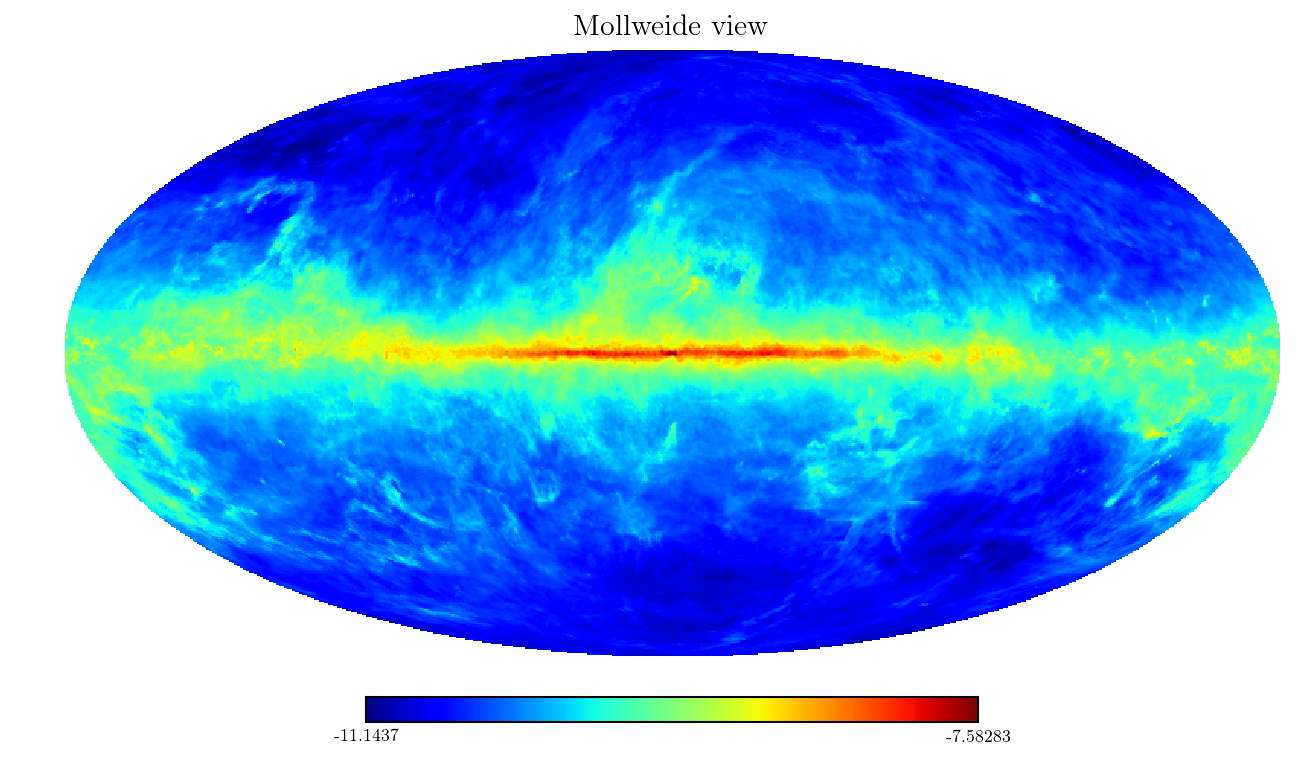

In [21]:
# Print the template names
for t in h5['templates']:
    print t 

# Get the energies in MeV 
energies = h5['/templates/energies'][...]    
print 'Energies', energies

# Plot the pi0 template in the 10th energy bin. This is the flux density in the same units
#   as the input galprop maps. 
import healpy
healpy.mollview(np.log10(h5['/templates/pi0'][...][10]))

We see templaets for the various ICS components, pi0 and brem templates, as well as the energies corresponding to them.  (There are also templates with _0,_1 as suffixes.  These are the inner two gas rings in case we want to let those float independently also, but normally we don't need them.) 

## Fit Results

In [33]:


# Print the fit results available
print 'Results:'
for fit_result in h5['/fit_results/']:
    print '    ', fit_result

print '\nAttributes of the result:'
fit_attributes = h5['/fit_results/global/'].attrs
for key, val in fit_attributes.items():
    print '    ', key, val
    print 
    


Results:
     global
     globalmask

Attributes of the result:
     globalvalues [['pi0HIHII' '0.631429793074']
 ['PSC' '1.0']
 ['pi0_H2_1' '1.36042623281']
 ['pi0_H2_9' '41.490372711']
 ['pi0_H2_3' '2.6001069192']
 ['pi0_H2_2' '2.94718972513']
 ['pi0_H2_5' '1.78169374829']
 ['Isotropic' '1.68326906807']
 ['pi0_H2_7' '0.464664739715']
 ['pi0_H2_6' '0.984727966643']
 ['ics' '0.730097486767']
 ['pi0_H2_8' '0.70563031514']
 ['Bubbles' '1.67211962516']
 ['pi0_H2_4' '2.23842371725']]

     globalvaluesUnc [['pi0HIHII' '0.00103967370043']
 ['PSC' '0.1']
 ['pi0_H2_1' '0.0140640825807']
 ['pi0_H2_9' '0.1']
 ['pi0_H2_3' '0.0288036538217']
 ['pi0_H2_2' '0.0555820922589']
 ['pi0_H2_5' '0.00677916595409']
 ['Isotropic' '0.1']
 ['pi0_H2_7' '0.1']
 ['pi0_H2_6' '0.00451222851008']
 ['ics' '0.00157945467082']
 ['pi0_H2_8' '0.1']
 ['Bubbles' '0.1']
 ['pi0_H2_4' '0.0125198913634']]

     globalfval -26110039.7153

     localfval -507761.77453

     outerfval -10709561.5541

     innerfval -26110039.715

We can see that the raw template values are included as well as the fit settings.  The most important settings are the -loglikelihoods for each region: "localfval", "outerfval", "innerfval", and the total sum of these "globalfval".  Note that these do not contain the constant terms of the likelihood function so only use relative values. 

# The galdef folder
This just contains a copy of the galdef settings for the input model so they are easy to reference. 

In [35]:
galdef_attributes = h5['/galdef'].attrs
for key, val in galdef_attributes.items():
    print '    ', key, val
    

     nuc_g_2 2.47
     control_diagnostics 0
     nuc_g_1 1.87944
     iso_abundance_15_031 4.242
     iso_abundance_18_040 0.001744
     d_lat 0.25
     cr_source_w_01 0.1
     Ekin_factor 1.2
     K_capture 1
     use_Z_30 0
     B_field_name galprop_original
     iso_abundance_27_059 2.214
     source_model 2
     D0_xx 5e+28
     ISRF_healpixOrder 1
     long_min 0.125
     iso_abundance_10_020 312.5
     verbose 0
     SNR_electron_sdg 0.00
     iso_abundance_10_021 0.003556
     electron_norm_Ekin 3.45e4
     iso_abundance_14_030 24.68
     DM_int0 1
     network_iter_compl 1
     iso_abundance_17_037 0.001167
     iso_abundance_17_035 0.7044
     iso_abundance_19_041 0.0003339
     iso_abundance_19_040 3.022
     gamma_rays 2
     iso_abundance_02_003 0.
     iso_abundance_03_006 0
     iso_abundance_03_007 0
     SNR_nuc_dgpivot 5.0e3
     use_Z_27 1
     GCR_data_filename GCR_data_4.dat
     source_radius 0
     skymap_format 3
     cr_source_z_02 0.2
     cr_source_z_01 0.1
 